### Lab 15: Using Scikit-Learn for Decision Tree Modelling

In this lab, we use scikit-learn to build decision tree models that will predict whether
a song is Rock, Pop, or Hip-Hop.

In [2]:
# imports
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [6]:
# Read training and test data.  Split both into X (features) and y (classes)
train = pd.read_csv('spotify_train.csv')
X_train = train.iloc[:, :-1]
y_train = train.track_genre

test = pd.read_csv('spotify_test.csv')
X_test = test.iloc[:, :-1]
y_test = test.track_genre



In [7]:
y_test

0          pop
1          pop
2         rock
3      hip-hop
4         rock
        ...   
995        pop
996       rock
997       rock
998        pop
999       rock
Name: track_genre, Length: 1000, dtype: object

In [8]:
# Create a model object
clf = DecisionTreeClassifier()


# Train the model
clf = clf.fit(X=X_train, y = y_train)

# Predict the classes
y_pred = clf.predict(X_test)

# Print model accuracy
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.725


In [10]:
# How to visualize the decision tree
# Requires installation of additional libraries:
# conda install graphviz
# conda install pydotplus


from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_train.columns,class_names=['rock', 'pop', 'hip-hop'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rph.png')
Image(graph.create_png())


In [13]:
# Can we do better by not overfitting?

accuracies = []

for max_depth in range(1, 30):

    # Create a model object
    clf = DecisionTreeClassifier(criterion = 'entropy', splitter='best', max_depth=max_depth)


    # Train the model
    clf = clf.fit(X=X_train, y = y_train)

    # Predict the classes
    y_pred = clf.predict(X_test)

    # Print model accuracy
    print("Depth: ", max_depth, "Accuracy: ", metrics.accuracy_score(y_test, y_pred))
    
    accuracies.append(metrics.accuracy_score(y_test, y_pred))


Depth:  1 Accuracy:  0.535
Depth:  2 Accuracy:  0.648
Depth:  3 Accuracy:  0.702
Depth:  4 Accuracy:  0.704
Depth:  5 Accuracy:  0.725
Depth:  6 Accuracy:  0.745
Depth:  7 Accuracy:  0.722
Depth:  8 Accuracy:  0.744
Depth:  9 Accuracy:  0.754
Depth:  10 Accuracy:  0.754
Depth:  11 Accuracy:  0.748
Depth:  12 Accuracy:  0.758
Depth:  13 Accuracy:  0.755
Depth:  14 Accuracy:  0.749
Depth:  15 Accuracy:  0.747
Depth:  16 Accuracy:  0.756
Depth:  17 Accuracy:  0.743
Depth:  18 Accuracy:  0.747
Depth:  19 Accuracy:  0.748
Depth:  20 Accuracy:  0.751
Depth:  21 Accuracy:  0.75
Depth:  22 Accuracy:  0.753
Depth:  23 Accuracy:  0.749
Depth:  24 Accuracy:  0.746
Depth:  25 Accuracy:  0.748
Depth:  26 Accuracy:  0.753
Depth:  27 Accuracy:  0.744
Depth:  28 Accuracy:  0.756
Depth:  29 Accuracy:  0.753


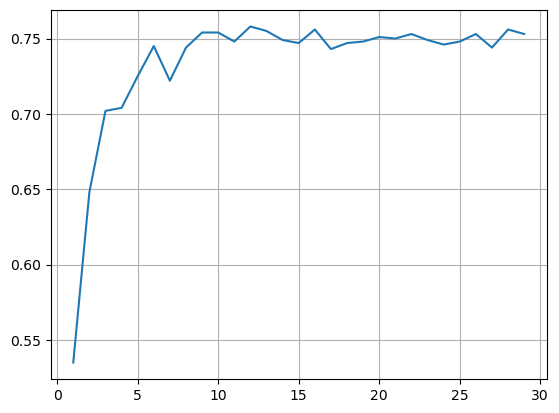

In [14]:

plt.plot(range(1,30), accuracies)
plt.grid()